### 정규분포(Normal Distribution)

- 매우 자주 사용되는 주요한 확률분포
- 자연계에서 일어나는 수많은 현상 표현

- 가우스 분포로도 불림

- 파라미터: 평균, 분산

- 정규 분포 표기법: N(평균,분산)

- 기대값 : E(X) , V(X)

- 선형 변환시 정규분포의 기대값과 분산

   - X~N(E(X),V(X))라고 할 때, 임의의 실수 a,b

   - aX + b ~ N(aE(X) + b, a^2*V(X))

<br>

### 표준 정규 분포(Standard Normal Distribution)

X~N(E(X),V(X))를 선형 변환에 의해서 정규화한 확률변수 Z = (X-E(X))/(V(X))**0.5을 따루는 것을 말한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [2]:
linestyles = ['-','--', ':']

In [3]:
def E(X, g=lambda x:x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x:x):
    x_range, f =X
    mean = E(X,g)
    def integrand(x):
        return (g(x)-mean) **2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [4]:
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >=0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0],6)
    assert prob_sum ==1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')

In [5]:
def plot_prob(X,x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f,  -np.inf,x)[0]
    
    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label = 'f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label = 'F(x)', ls='--', color='gray')
    ax.legend()
    plt.show()


In [ ]:
#정규 분포 구현

def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1/ np.sqrt(2*np.pi * sigma**2) * (np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [ ]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [ ]:
check_prob(X)

In [ ]:
plot_prob(X,0,4)

In [ ]:
#정규분포
rv = stats.norm(2,0.5)
rv.mean(), rv.var()

rv.pdf(2)
rv.cdf(1.7)

rv.isf(0.3)
rv.interval(0.9)
rv.isf(0.95), rv.isf(0.05)

In [ ]:
from typing_extensions import ParamSpecArgs
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,2), (1,1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label = f'N({mu}, {sigma**2})', ls=ls, color='gray'
ax.legend()
plt.show()

### 지수 분포(Exponential Distribution)

- 어떤 사건이 발생하는데 소요되는 시간에 따른 확률분포

- 취할 수 있는 값의 범위: 0이상의 실수

- 파라미터: a[람다](단위 시간당 평균 발생 횟수->양의 실수)

- 지수 분포 표기법: Ex(a)

- 확률밀도 함수 공식

   - f(x) = ae^(-ax) (x>=0)

   - f(x) = 0 (otherwise)

- 기대값: E(x) = 1/a

- 분산: V(X) = 1/a^2

In [9]:
## 지수 분포 구현

def Ex(lam):
    x_range = [0,np.inf]
    def f(x):
        if x>=0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f
    

In [10]:
lam = 3
X =Ex(lam)

In [12]:
check_prob(X)

expected vaue 0.333
variance 0.111


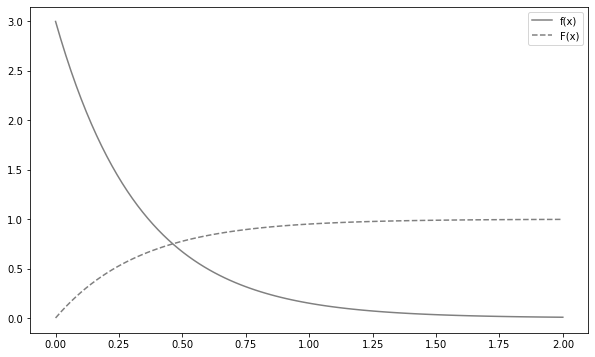

In [13]:
plot_prob(X,0,2)

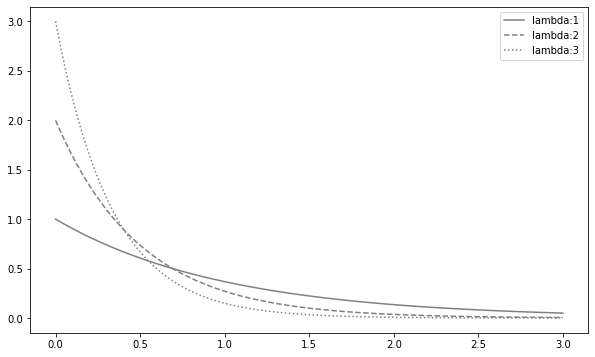

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale=1/ lam)
    ax.plot(xs, rv.pdf(xs),
            label = f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

## 카이제곱/t/F분포

- 추정과 검정에 사용될 특수한 확률분포

- 어떤 사건을 따르는 것이 아닌 어떤 형태를 따르는지에 따라 표현되는 확률 분포

- 정규분포와 어떤 관련성을 맺고 있는지에 대해 중점을 두고 표현

<br>

### 카이제곱 분포(Chi-square Distribution)

- 분산의 구간추정이나 독립성 검정에서 사용되는 확률분포
- 서로 독립인 복수의 표준정규분포에 의해 정의
- Z1,Z2,...,Zn이 서로 독립이고 N(0,1)을 따르고 있을 때 그 제곱합의 확률분포를 자유도가 n인 카이제곱분포라고 한다.

- 취할 수 있는 값:0이상인 실수

- 카이제곱 분포 표기법 : X^2(n)

- 좌우비대칭으로서, 왼쪽으로 치우치고 오른쪽으로 넓어짐

- 자유도가 커지면 좌우대칭에 가까워진다.

- 자유도의 값 가까이 분포의 정점 존재

In [17]:
ㄱ#무작위 추출로 100만번 수행해서 데이터 얻기

n = 10
rv = stats.norm()
sample_size = int(1e6)
#표준정규분포로부터 10*100만 사이즈로 무작위 추출
Zs_sample = rv.rvs((n, sample_size))
#axis=0에서 총합을 구하고, 표준정규분포의 제곱할 표본 데이터 구하기
chi2_sample = np.sum(Zs_sample**2, axis=0)  

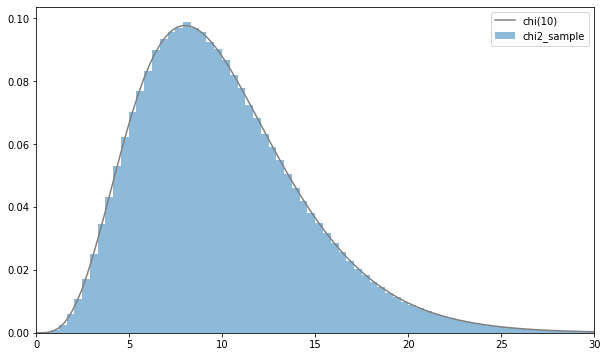

In [19]:
#카이제곱분포 시각화

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)
ax.hist(chi2_sample, bins=100, density= True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi({n})', color='gray')
ax.legend()
ax.set_xlim(0,30)
plt.show()

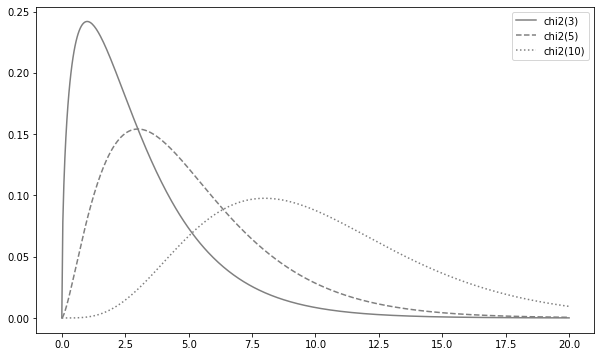

In [21]:
#숫자 여러개로 비교

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,20,500)
for n,ls in zip([3,5,10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label = f'chi2({n})', ls=ls, color='gray')


ax.legend()
plt.show()

In [22]:
#상위 0.05

rv = stats.chi2(5)
rv.isf(0.05)

11.070

### t분포

- Z,Y는 서로 독립이고 Z~N(0,1)을 Y~X^2(n)을 따를 때의 확률분포를 자유도가 n인 t분포라고 표현

- 식

   - t =Z /(Y/n)**0.5

- 취할 수 있느 값 : 실수 전체

- t 분포 표기법: t(n)

In [24]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = z_sample / np.sqrt(chi2_sample/n)

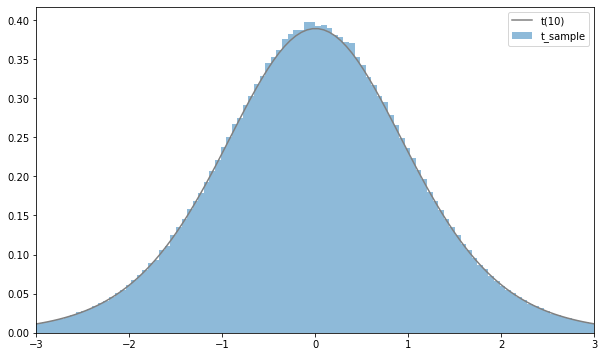

In [26]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3,3,100)
ax.hist(t_sample, bins=100, range=(-3,3),
        density =True, alpha =0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3,3)
plt.show()

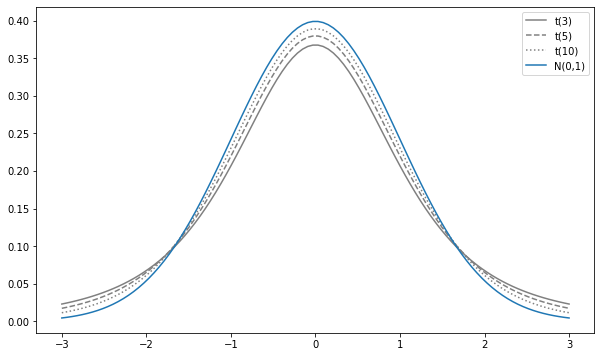

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


xs = np.linspace(-3,3,100)
for n,ls in zip([3,5,10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label = f't({n})', ls=ls, color='gray')
rv= stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0,1)')

ax.legend()
plt.show()

In [29]:
rv = stats.t(5)
rv.isf(0.05)

2.015

### F분포

- 분산분석 등에서 사용되는 확률분포

- Y1,Y2는 서로 독립이거 Y1~X^2(n1)을 Y2~X^2(n2)를 따를 때의 확률분포를 자유도가 n1, n2인 F분포라고 표현

- 식

   - F = (Y1/n1)/(Y2/n2)

- 취할 수 있는 값: 0이상인 실수

- F분포 표기법: F(n1,n2)

- 좌우비대칭인 분포

- 왼쪽으로 치우치고, 오른쪽으로 넓어지는 분포

- 분포의 정점은 1에 가까움

In [30]:
n1 =5
n2 =10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

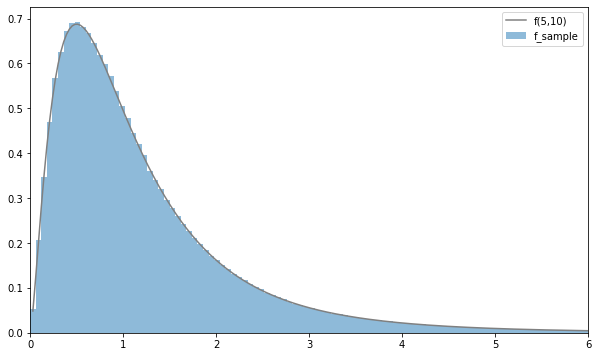

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1,n2)
xs = np.linspace(0,6,200)[1:]
ax.hist(f_sample, bins=100, range=(0,6),
        density =True, alpha =0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'f({n1},{n2})', color='gray')

ax.legend()
ax.set_xlim(0,6)
plt.show()

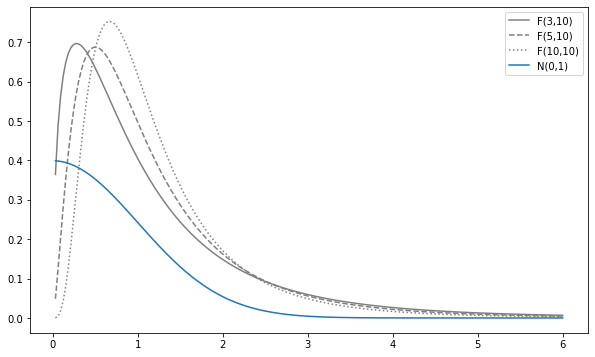

In [32]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


xs = np.linspace(0,6,200)[1:]
for n1,ls in zip([3,5,10], linestyles):
    rv = stats.f(n1,10)
    ax.plot(xs, rv.pdf(xs),
            label = f'F({n1},10)', ls=ls, color='gray')
rv= stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0,1)')

ax.legend()
plt.show()